# Finding the best crop in the district to get the max profit 

### load the data 

In [1]:
import pandas as pd
import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# load dataset
df = pd.read_csv('csv')

# getting the uniques districts in a list 
district_unique = df['district'].unique()

df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


it is the actual data which has the details of the different crops and the price of it 

### Recreating the dataset so that it is used to find the ideal crop in the district

In [2]:
# Extract relevant features and target variable
X = df[['state', 'district', 'market', 'commodity', 'variety', 'arrival_date', 'min_price', 'max_price']]
y = df['modal_price']

# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables to one-hot encoding
X_train = pd.get_dummies(X_train, columns=['state', 'district', 'market', 'commodity', 'variety'])
X_test = pd.get_dummies(X_test, columns=['state', 'district', 'market', 'commodity', 'variety'])

# Convert date strings to numerical format
X_train['arrival_date'] = pd.to_datetime(X_train['arrival_date']).astype(int) / 10**9
X_test['arrival_date'] = pd.to_datetime(X_test['arrival_date']).astype(int) / 10**9

# Get common columns between X_train and X_test
common_cols = X_train.columns.intersection(X_test.columns)

# Select only common columns for X_train and X_test
X_train = X_train[common_cols]
X_test = X_test[common_cols]

# Tree regression model

In [3]:
# Create a decision tree regression model
model = DecisionTreeRegressor()

# Train the model using the training set
model.fit(X_train, y_train)

# Evaluate the model using the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 18429250.20089286


# getting the best crop in a district 

In [5]:
# Predict the highest modal_price commodity in a district
district = 'Chittor'
highest_modal_price_commodity = X[df['district'] == district]['commodity'][y[df['district'] == district].idxmax()]
print('Highest modal price commodity in', district, ':', highest_modal_price_commodity)

Highest modal price commodity in Chittor : Tomato


## Getting the highest sold crop in 5 random districts 

In [159]:
for i in range(5):
    random_values = random.randint(0, len(district_list))
    district = district_list[random_values]
    highest_modal_price_commodity = X[df['district'] == district]['commodity'][y[df['district'] == district].idxmax()]
    print('Highest modal price commodity in', district, ':', highest_modal_price_commodity)


Highest modal price commodity in Kheda : Sweet Potato
Highest modal price commodity in Erode : Sesamum(Sesame,Gingelly,Til)
Highest modal price commodity in South District : Onion
Highest modal price commodity in South District : Onion
Highest modal price commodity in Kottayam : Ginger(Green)


### ploting the top 6 highest districts with high price

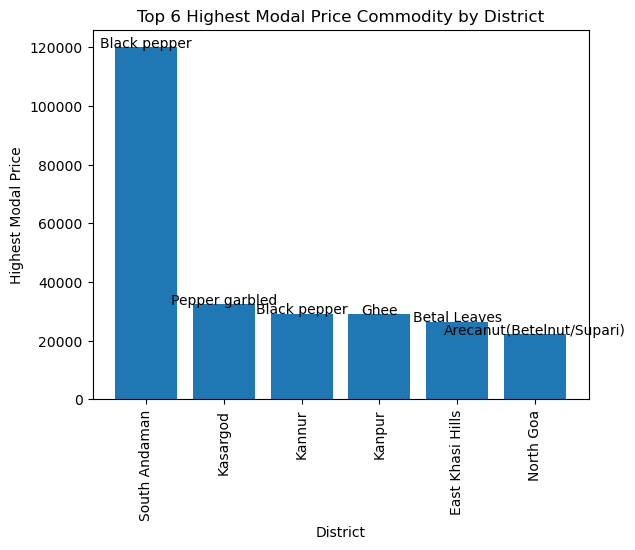

In [160]:
# Group the data by district and find the highest modal_price commodity for each district
grouped = df.groupby('district').apply(lambda x: x.loc[x['modal_price'].idxmax()])

# Sort the districts by highest modal_price commodity
grouped = grouped.sort_values(by=['modal_price'], ascending=False)

# Limit the graph to show only the top 10 districts
top_n = 6
grouped = grouped.head(top_n)

# Create a bar chart with district and highest modal_price commodity name
plt.bar(grouped['district'], grouped['modal_price'])
plt.xlabel('District')
plt.ylabel('Highest Modal Price')
plt.title(f'Top {top_n} Highest Modal Price Commodity by District')
plt.xticks(rotation=90)

# Add highest modal_price commodity name to each bar
for i, row in grouped.iterrows():
    plt.text(i, row['modal_price'], row['commodity'], ha='center')

plt.show()